In [1]:
import numpy as np

# 1- Plots and Visualization

There are different packages meant for plotting and visualizing data. The most common for graphs in 2D is matplotlib. For many different examples and usage see: 
https://matplotlib.org/gallery/index.html


In [2]:
import matplotlib.pyplot as plt

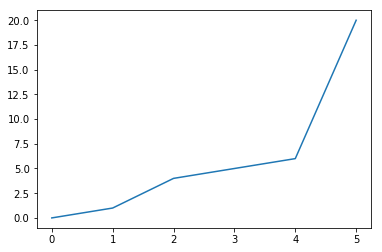

In [3]:
# x coordinates
xi = [0,1,2,3,4,5]
#y coordinates
yi = [0,1,4,5,6,20]

plt.plot(xi,yi)

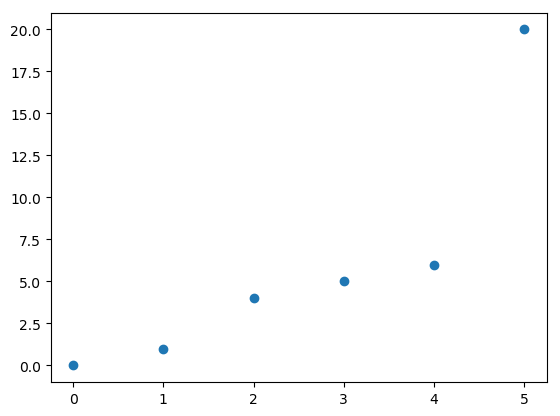

In [141]:
#the option 'o' plots just the points. 
plt.plot(xi,yi,'o')

For plotting in 3D, need to add another library. 

In [4]:
from mpl_toolkits.mplot3d import axes3d

# 2- Persistent Homology in toolkit for Python

The python package ```ripser``` is used to compute persistent homology and visualize the results using python. 

In [5]:
from ripser import ripser, lower_star_img
from persim import plot_diagrams

### 2.1 Sampling points on $\mathbb{R}^2$

A nice way to learn how to use the package is by studying well known objects. The idea is to generate random points on a surface and use the software to recover the surface. The function that generates $n$ random points in $\mathbb{R}^d$ is ```np.random.random((n,d))```. All the coordinates are between 0 and 1.

In [6]:
#four random points in R^2
print(np.random.random((4,2)))

[[0.5745426  0.54998134]
 [0.68631107 0.94694927]
 [0.04628299 0.17724481]
 [0.98162294 0.13185861]]


In [7]:
#two random point in R^4
print(np.random.random((2,4)))

[[0.28428959 0.67769572 0.64799192 0.87843136]
 [0.23290947 0.29296043 0.2444339  0.01340294]]


#### Random points on the plane:

In [8]:
#generate 100 random points in 
random_pts_plane = np.random.random((100,2))

#print first 10 points in the list
random_pts_plane[:10]

array([[0.30066842, 0.60128271],
       [0.31602966, 0.39813052],
       [0.21184156, 0.8592739 ],
       [0.15477317, 0.66880611],
       [0.04953888, 0.30210383],
       [0.16016474, 0.81731765],
       [0.82331811, 0.62331643],
       [0.49853732, 0.88964595],
       [0.57239841, 0.46151359],
       [0.00332255, 0.0663013 ]])

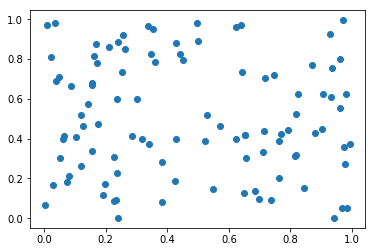

In [9]:
#visualize the points using plot(x,y,--options)
plt.plot(random_pts_plane[:,0],random_pts_plane[:,1],"o")
plt.show()

The persistent homology of this set of points can be computed using ```ripser```. To see the persistence diagram we use ```plot_diagrams``` from the ```persim```library. 

In this example, there aren't any relevant topological structures. 

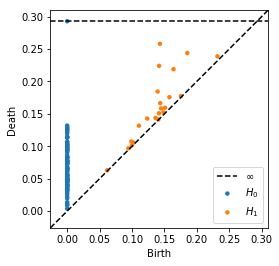

In [10]:
ph_plane = ripser(np.random.random((100,2)))['dgms']
plot_diagrams(ph_plane, show=True)

### Exercises
#### 1- Reducing the number of random points, how does the persistence diagram change?



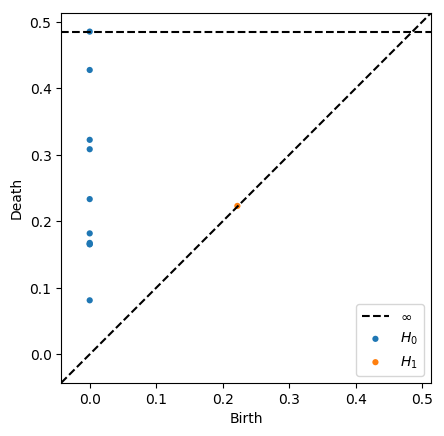

In [11]:
#Do your work here
#10 random points
ph_plane = ripser(np.random.random((10,2)))['dgms']
plot_diagrams(ph_plane, show=True)

#### 2- Sampling points on a circle. Taking a point $v=(x,y)$ on the plane we can obtain a point in the unit circle by dividing by the modulus:
$$\tilde{p}=\frac{v}{\lvert v\rvert}=\frac{(x,y)}{\sqrt{x^2+y^2}}.$$
```Numpy``` has the function ```np.linalg.norm()``` to compute the norm $\lvert v\rvert$ of a vector.

In [150]:
#norm of the vector [1,1]
print(np.linalg.norm([1,1]))
#point in the circle
print([1,1]/np.linalg.norm([1,1]))

1.4142135623730951
[0.70710678 0.70710678]


#### Sample 100 points in a circle and plot the persistence diagram. Do the same for 5 points and 20. Compare the performances. 

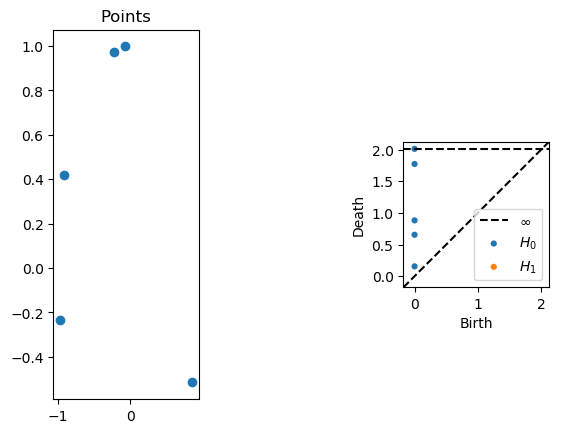

In [26]:
#do your work here
numpts=5

pts_circle=np.array([pt/np.linalg.norm(pt) for pt in np.random.random((numpts,2))-[0.5,0.5]])

ph_circ = ripser(pts_circle)['dgms']

plt.subplot(131)
plt.plot(pts_circle[:,0],pts_circle[:,1],"o")
plt.title("Points")
plt.subplot(133)
plot_diagrams(ph_circ, show=True)

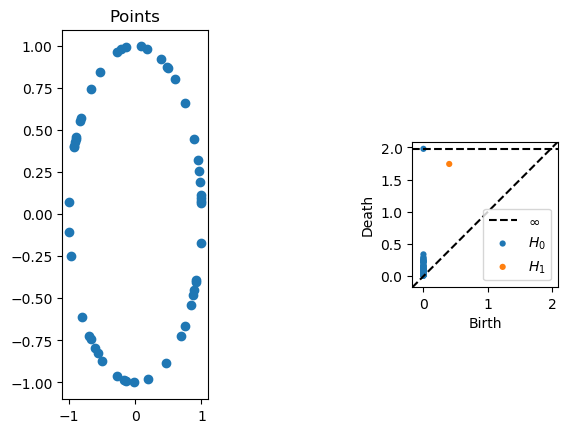

In [27]:
numpts=50

pts_circle=np.array([pt/np.linalg.norm(pt) for pt in np.random.random((numpts,2))-[0.5,0.5]])

ph_circ = ripser(pts_circle)['dgms']

plt.subplot(131)
plt.plot(pts_circle[:,0],pts_circle[:,1],"o")
plt.title("Points")
plt.subplot(133)
plot_diagrams(ph_circ, show=True)

#### 3- The following code adds noise to the . Compare by changing the value of the parameters ```noise``` and ```numpts```

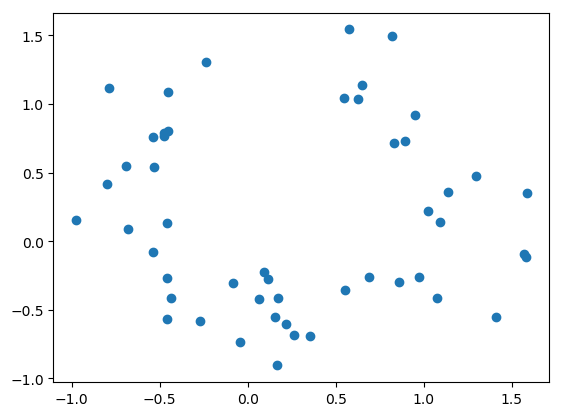

In [33]:
#edit these parameters
noise=0.7
numpts=50

#do NOT modify this part
pts_circle_noise=np.array([np.random.random((1,2))[0]*noise + p/np.linalg.norm(p) for p in np.random.random((numpts,2))-[0.5,0.5]])
plt.plot(pts_circle_noise[:,0],pts_circle_noise[:,1],"o")
plt.show()

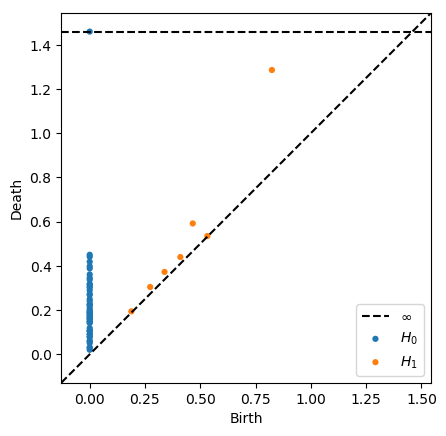

In [34]:
#plot the persistence diagram
ph_circ_noise = ripser(pts_circle_noise)['dgms']
plot_diagrams(ph_circ_noise, show=True)

### 2.2 Sampling points on $\mathbb{R}^3$
Now we test the same idea for higher dimensions. Again, if we just sample random points, the persistence diagrams shouldn't show any relevant topological properties. 

In [35]:
#generate 100 random points in 3D space
random_pts_3d=np.random.random((100,3))
print(random_pts_3d[:10])

[[0.88851142 0.20558007 0.4672849 ]
 [0.87214359 0.7110572  0.13566668]
 [0.63032336 0.88792969 0.83022143]
 [0.06146013 0.90020801 0.34409951]
 [0.20235802 0.29279564 0.23055781]
 [0.72207571 0.64667413 0.57758031]
 [0.6631987  0.85187454 0.74192413]
 [0.9994294  0.3470462  0.28600807]
 [0.32814718 0.45565315 0.66804404]
 [0.20153404 0.60638074 0.31103659]]


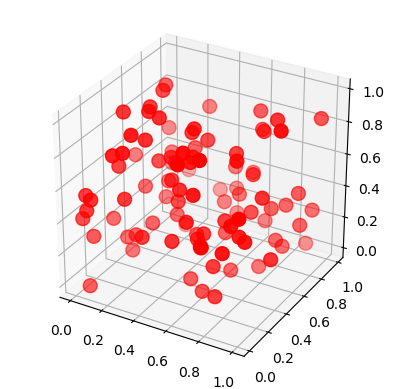

In [36]:
#separate the first, second and third coordinates
xin = [pt[0] for pt in random_pts_3d]
yin = [pt[1] for pt in random_pts_3d]
zin = [pt[2] for pt in random_pts_3d] 

fig,ax = plt.subplots(1, 1, subplot_kw={'projection':'3d', 'aspect':'equal'})
ax.scatter(xin, yin, zin, s=100, c='r', zorder=10)

Since now we are working in 3D, we add the option ```maxdim=2``` to the function ```ripser```. The following diagram doesn't show any relevant topology. 

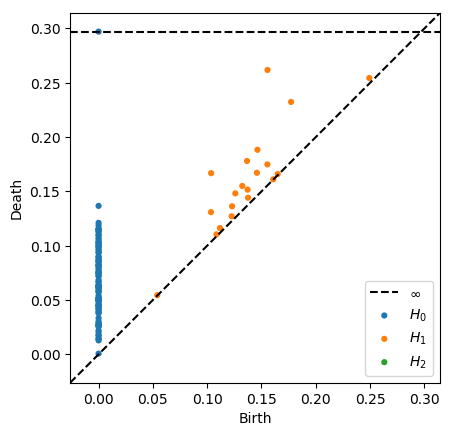

In [37]:
ph_plane = ripser(np.random.random((100,2)),maxdim=2)['dgms']
plot_diagrams(ph_plane, show=True)

### Exercises 
#### 1- Generate random points on a sphere. Check that if enough points are generated, the persistence diagram shows 1 component, 1 void and no holes. 

In [ ]:
numpts=1000
pts_sphere=np.array([pt/np.linalg.norm(pt) for pt in np.random.random((numpts,3))-[0.5,0.5,0.5]])
print(pts_sphere[:5])

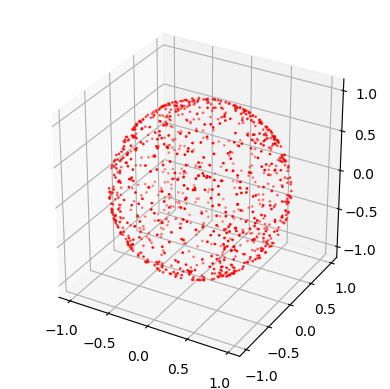

In [45]:
fig,ax = plt.subplots(1, 1, subplot_kw={'projection':'3d', 'aspect':'equal'})
ax.scatter(pts_sphere[:,0], pts_sphere[:,1], pts_sphere[:,2], s=1, c='r', zorder=10)

In [ ]:
ph_sphere = ripser(pts_sphere,maxdim=2)['dgms']
plot_diagrams(ph_sphere, show=True)

#### 2- Do the same for the torus, . Check that if enough points are generated, the persistence diagram shows 1 component, 2 holes and 1 void. 

# 3- Cell Counting (from https://ripser.scikit-tda.org)

Let’s now look at a slightly more exciting example. We’ll analyze the following creative commons image of plant cells, taken from this link

When we convert this image to grayscale in the range $[0,255]$, where 0 is dark and 255 is bright, we see that the interiors of the cells are high while each cell meets at a saddle point somewhere on the boundary which is closer to 0.

In this case, we posit that there is a local max of large persistence within each cell; that is, we want to perform a superlevelset / upper star filtration. To hack our code so that it works for local maxes instead of local mins, we can simply feed the lower star filtration function the negative of the image. Let’s do this now and plot the lifetimes:

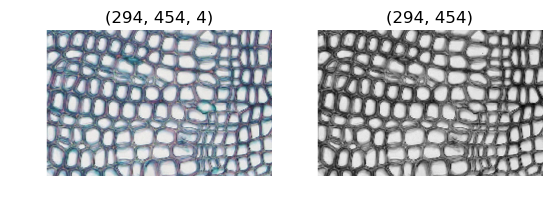

In [158]:
import scipy
from scipy import ndimage
import PIL
cells_original = plt.imread("Cells.jpg")
cells_grey = np.asarray(PIL.Image.fromarray(cells_original).convert('L'))

plt.subplot(121)
plt.title(cells_original.shape)
plt.imshow(cells_original)
plt.axis('off')

plt.subplot(122)
plt.title(cells_grey.shape)
plt.imshow(cells_grey, cmap='gray')
plt.axis('off')
plt.show()


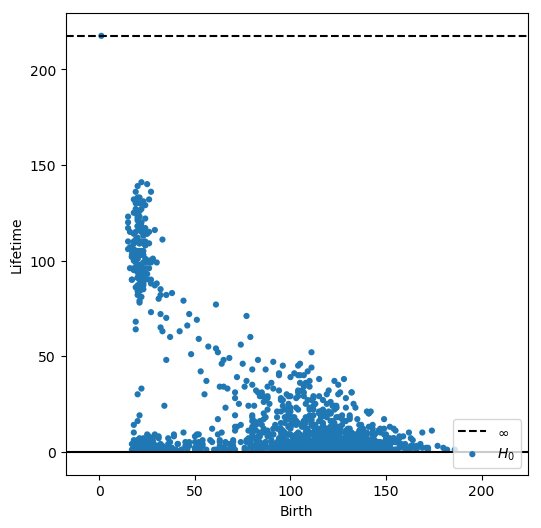

In [159]:
dgm = lower_star_img(-cells_grey)
plt.figure(figsize=(6, 6))
plot_diagrams(dgm, lifetime=True)
plt.show()

Let’s now pick a persistence threshold, above which we consider a dot to be associated to a cell.

Ripser.py does not currently return representatives for 0-dimensional homology classes but we can do a little workaround where we add a small amount of uniform noise to each pixel. This makes every pixel have a unique value so we can simply find the pixel whose value is equal to the birth time of the class we are looking for. We also perform a local averaging before we do this to encourage the representatives of the maximums to be closer to the center of the cell.

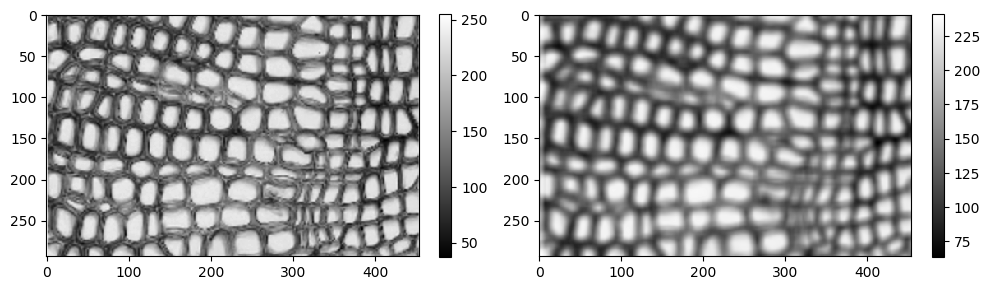

In [160]:
smoothed = ndimage.uniform_filter(cells_grey.astype(np.float64), size=10)
smoothed += 0.01 * np.random.randn(*smoothed.shape)

plt.figure(figsize=(10, 5))
plt.subplot(121)
im = plt.imshow(cells_grey, cmap='gray')
plt.colorbar(im, fraction=0.03)

plt.subplot(122)
im = plt.imshow(smoothed, cmap='gray')
plt.colorbar(im, fraction=0.03)

plt.tight_layout()
plt.show()

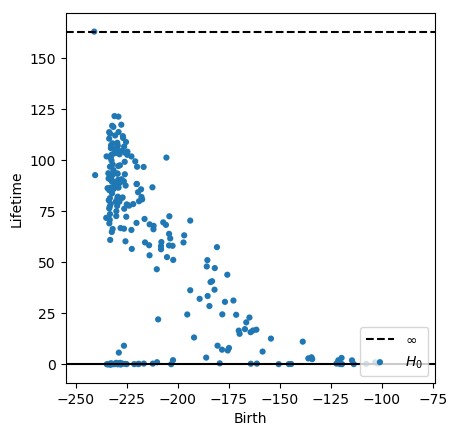

In [161]:
dgm = lower_star_img(-smoothed)
plot_diagrams(dgm, lifetime=True)
plt.show()

We’ll eyeball a cutoff and look at all points with lifetime greater than 50. Below, we show each of the 0-dimensional pixel representatives highlighted in the original image.

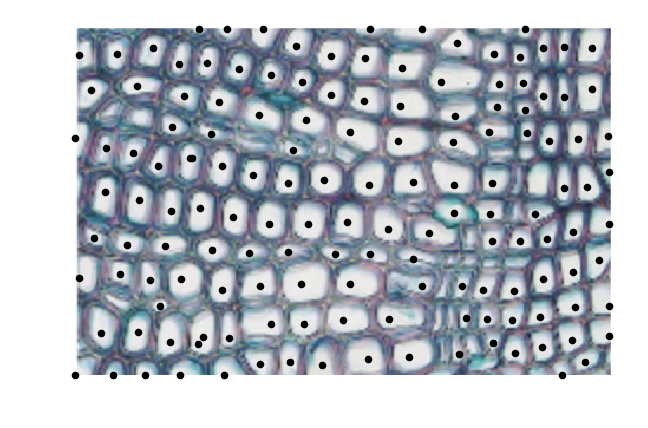

In [162]:

thresh = 50
idxs = np.arange(dgm.shape[0])
idxs = idxs[np.abs(dgm[:, 1] - dgm[:, 0]) > thresh]

plt.figure(figsize=(8, 5))
plt.imshow(cells_original)

X, Y = np.meshgrid(np.arange(smoothed.shape[1]), np.arange(smoothed.shape[0]))
X = X.flatten()
Y = Y.flatten()
for idx in idxs:
    bidx = np.argmin(np.abs(smoothed + dgm[idx, 0]))
    plt.scatter(X[bidx], Y[bidx], 20, 'k')
plt.axis('off')

plt.show()

### Exercises
#### 1- Find an image online of cells (or any other round thing) and count them using this method. 

In [163]:
#do your work here